# Medición de tiempo de reverberación

### 1- ejecutar el codigo para obtener el piso de ruido durante 5 segundos

Medición de decibeles durante 5 segundos. Presiona Ctrl+C para detener.
Medición finalizada.


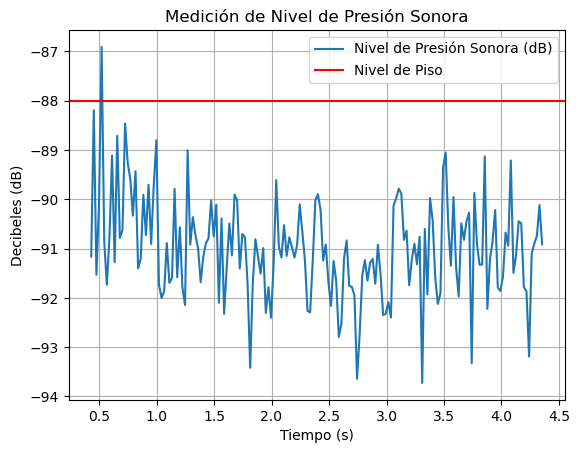

In [5]:
import sounddevice as sd
import numpy as np
import time
import matplotlib.pyplot as plt

def callback(indata, frames, time, status):
    if status:
        print(f"Error en la captura de audio: {status}")
    if any(indata):
        rms = np.sqrt(np.mean(indata**2))
        decibel = 20 * np.log10(rms)
        decibel_values.append(decibel)
        
device_info = sd.query_devices(None, 'input')
sample_rate = int(device_info['default_samplerate'])

duration = 5
decibel_values = []

print(f"Medición de decibeles durante {duration} segundos. Presiona Ctrl+C para detener.")
with sd.InputStream(callback=callback, channels=1, samplerate=sample_rate):
    start_time = time.time()
    while time.time() - start_time < duration:
        pass

print("Medición finalizada.")

piso = (sum(decibel_values[19:])/len(decibel_values[19:])) + 3

time_values = np.arange(0, len(decibel_values)) * (1000 / sample_rate)
# print(sample_rate)

plt.plot(time_values[19:], decibel_values[19:], label='Nivel de Presión Sonora (dB)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Decibeles (dB)')
plt.title('Medición de Nivel de Presión Sonora')
plt.legend()
plt.grid(True)

plt.axhline(y=piso, color='r', linestyle='-', label='Nivel de Piso')
plt.legend()

plt.show()


### 2- ejecutar el codigo y realizar una medición de la respuesta impulsiva

Medición de decibeles durante 5 segundos. Presiona Ctrl+C para detener.
Medición finalizada.


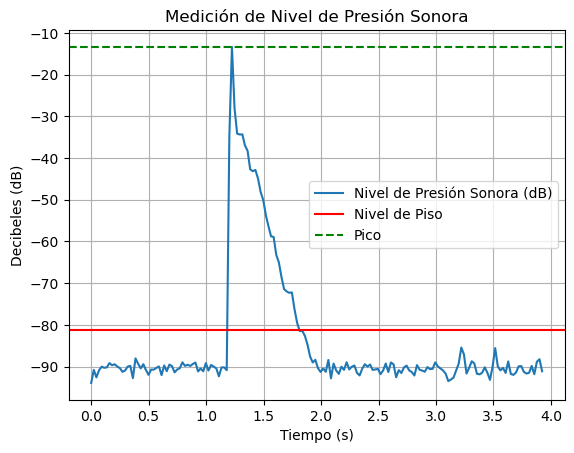

In [6]:
import sounddevice as sd
import numpy as np
import time
import matplotlib.pyplot as plt

def callback(indata, frames, time, status):
    if status:
        print(f"Error en la captura de audio: {status}")
    if any(indata):
        rms = np.sqrt(np.mean(indata**2))
        decibel = 20 * np.log10(rms)
        decibel_values_2.append(decibel)

device_info = sd.query_devices(None, 'input')
sample_rate = int(device_info['default_samplerate'])

decibel_values_2 = []

print(f"Medición de decibeles durante {duration} segundos. Presiona Ctrl+C para detener.")
with sd.InputStream(callback=callback, channels=1, samplerate=sample_rate):
    start_time = time.time()
    while time.time() - start_time < duration:
        pass

print("Medición finalizada.")

piso = (sum(decibel_values_2[19:])/len(decibel_values_2[19:])) + 3

pico = max(decibel_values_2)

time_values_2 = np.arange(0, len(decibel_values_2)) * (1000 / sample_rate)
plt.plot(time_values_2[:-19], decibel_values_2[19:], label='Nivel de Presión Sonora (dB)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Decibeles (dB)')
plt.title('Medición de Nivel de Presión Sonora')
plt.legend()
plt.grid(True)

plt.axhline(y=piso, color='r', linestyle='-', label='Nivel de Piso')

plt.axhline(y=pico, color='g', linestyle='--', label='Pico')

plt.legend()
plt.show()

### 3- En este codigo encontramos el pico y definimos si aplicamos el RT60 o RT30

In [8]:
if pico in decibel_values_2:
    posicion = decibel_values_2.index(pico)
    eje_decibel_new = decibel_values_2[posicion:]
    eje_time_new = time_values_2[posicion:]
    
if abs(pico-piso)>60:
    print(f'se puede hacer el RT60 ya que la disferencia es {abs(pico-piso)} ')
    rt = pico-60
    tipo_de_rt = 60
elif abs(pico-piso)>30:
    print(f'se puede hacer el RT30 ya que la disferencia es {abs(pico-piso)} ')
    rt = pico-30
    tipo_de_rt = 30
else:
    print(f"No hay una diferencia notable porque es {abs(pico-piso)}")
    
numero_mas_cercano = min(eje_decibel_new, key=lambda x: abs(x - rt))

posicion_mas_cercana = eje_decibel_new.index(numero_mas_cercano)

# print(f"El número más cercano a {rt} es {numero_mas_cercano} en la posición {posicion_mas_cercana}.")


se puede hacer el RT60 ya que la disferencia es 67.88525393913532 


### 4- en esta celda definimos donde se encuentra el resultado final

In [9]:
def encontrar_primeros_mayor_menor(array, valor):
    indice_menor = None

    for i, numero in enumerate(array):
        if numero < valor and indice_menor is None:
            indice_menor = i
    
    indice_mayor = indice_menor -1

    return indice_menor, indice_mayor

mi_array = eje_decibel_new

valor = rt

indice_menor, indice_mayor = encontrar_primeros_mayor_menor(mi_array, valor)


# print(indice_mayor,indice_menor)

### 5- por ultimo con este codigo graficamos el resultado

El resultado de RT60 es 0.544 S redondeado en tres unidades.


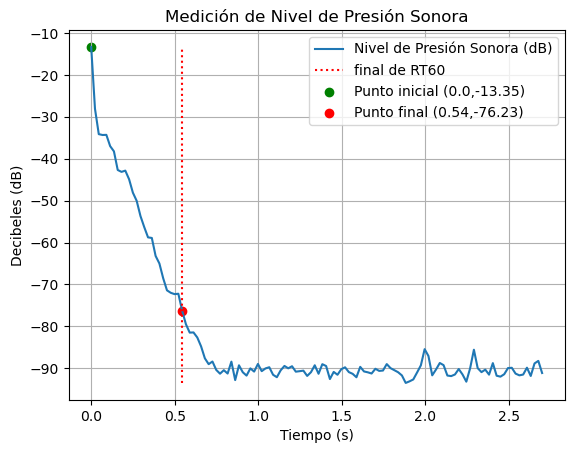

In [13]:
x = time_values[:len(eje_time_new)]
y = eje_decibel_new

plt.plot(x, y, label='Nivel de Presión Sonora (dB)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Decibeles (dB)')
plt.title('Medición de Nivel de Presión Sonora')
plt.grid(True)

plt.vlines(x[indice_menor], min(y), max(y), colors='red', linestyles='dotted', label=f'final de RT{tipo_de_rt}')
plt.scatter(x[0], y[0], color='green', marker='o', label=f'Punto inicial ({round(x[0],2)},{round(y[0],2)})')
plt.scatter(x[indice_menor], y[indice_menor], color='red', marker='o', label=f'Punto final ({round(x[indice_menor],2)},{round(y[indice_menor],2)})')

print(f'El resultado de RT{tipo_de_rt} es {round(x[indice_menor],3)} S redondeado en tres unidades.')

plt.legend()
plt.show()